<a href="https://colab.research.google.com/github/Skywind5487/cp_mycode/blob/main/%E3%80%8C%E6%AD%90%E5%A8%81%E9%9C%86_%5B%E8%AA%B2%E5%A0%82%E5%B0%8F%E7%B5%84%E7%B7%B4%E7%BF%92%5D%E6%B3%A2%E5%A3%AB%E9%A0%93%E6%88%BF%E5%83%B9%E7%9A%84%E6%95%88%E8%83%BD%E6%8F%90%E5%8D%87_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ref:[房價預測](https://letranger.github.io/AI/20221023154410-regression.html?authuser=1#org31bdb84)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import train_test_split
housing = pd.read_csv('https://raw.githubusercontent.com/letranger/AI/gh-pages/Downloads/boston_housing.csv')

#(train_x, train_y), (test_x, test_y) = boston_housing.load_data()
housing.dropna(axis=0, inplace=True)

mean = housing.iloc[:,:-1].mean(axis=0)
housing.iloc[:,:-1] -= mean
std = housing.iloc[:,:-1].std(axis=0)
housing.iloc[:,:-1] /= std

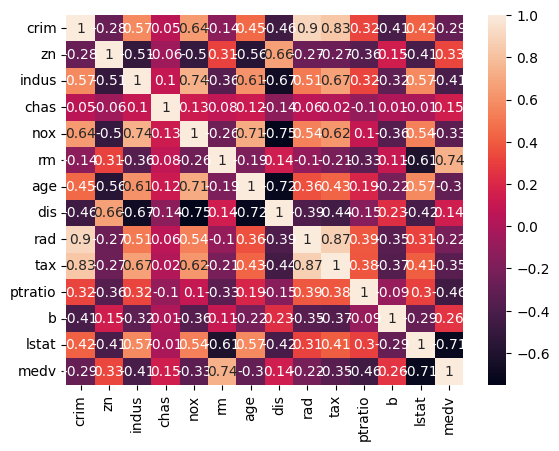

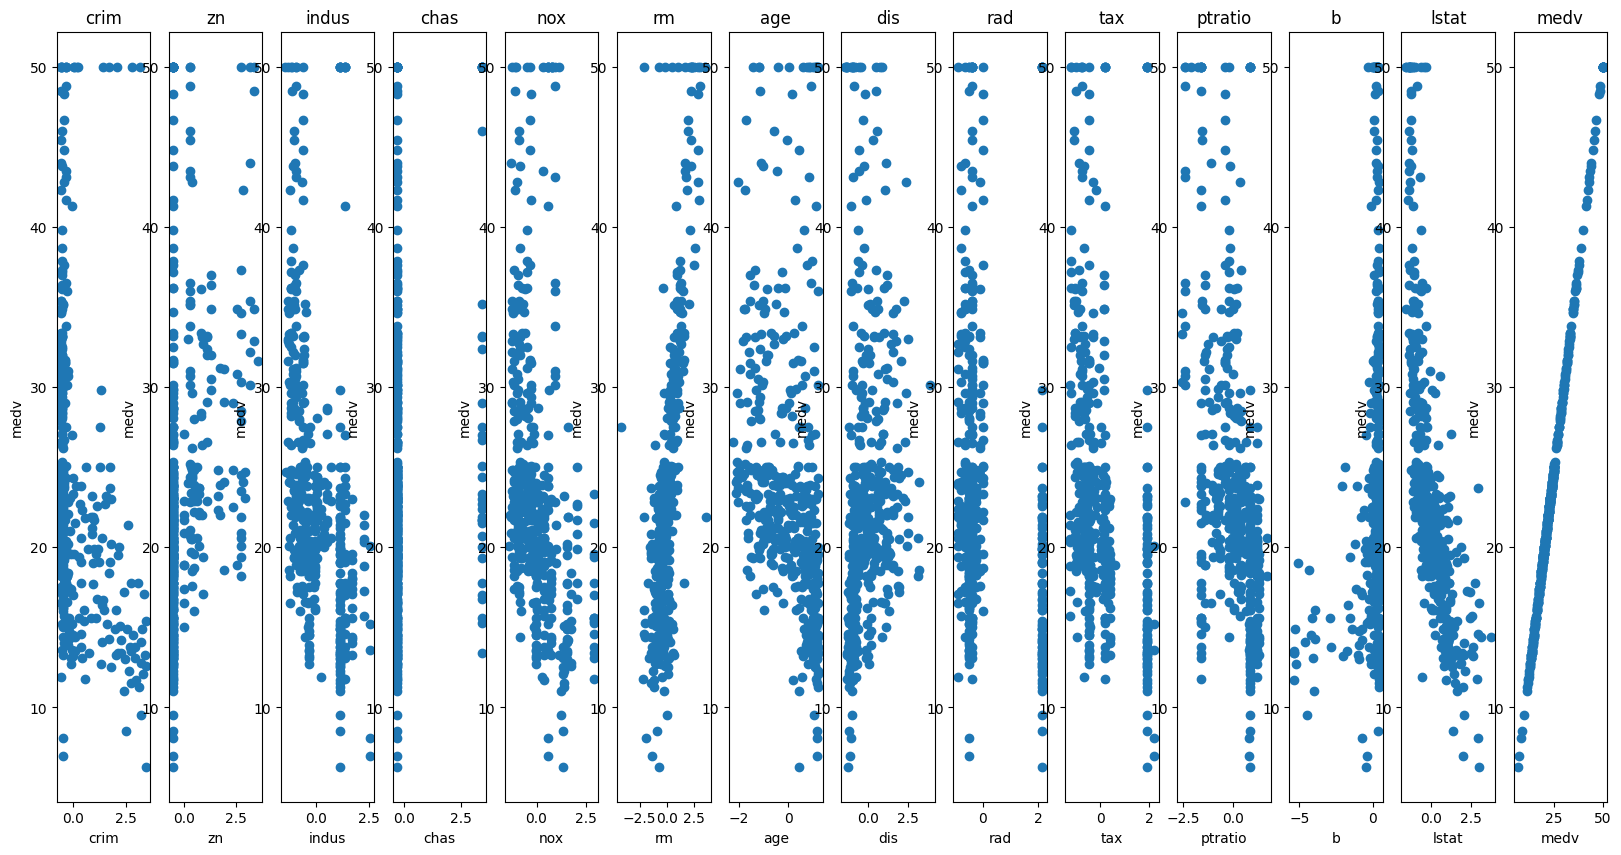

In [ ]:
sns.histplot(housing['medv'])
plt.savefig("housing-price.png", dpi=300)

correlation_matrix = housing.corr().round(2)

# annot = True 讓我們可以把數字標進每個格子裡

sns.heatmap(data=correlation_matrix, annot = True)

plt.savefig("housing-corr.png", dpi=300)

# 設定整張圖的長寬
plt.figure(figsize=(20, 10))
features = list(housing.columns)
target = housing['medv']
for i, col in enumerate(features):
    print("")
    # 排版1 row, 2 columns, nth plot：在jupyter notebook上兩張並排
    plt.subplot(1, len(features) , i+1)
    # add data column into plot
    x = housing[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')
plt.savefig('housing-2var.png', dpi=300)

In [ ]:
# dfs init
data = housing
Y = housing['medv']
data.drop(['medv'], axis=1, inplace=True)

# dfs init
Features = None
Max_depth = data.shape[1] -1
Max_R2 = 0
Max_features = None

In [ ]:
def moudle (reg):
  from sklearn import linear_model
  reg = linear_model.SGDRegressor()
  return reg


In [ ]:
def predict(features):
  X_train, X_test, Y_train, Y_test = train_test_split(features, Y, test_size = 0.3, random_state=5)
  reg = None
  reg = moudle(reg)
  reg.fit(X_train,Y_train)
  reg.predict(X_test)
  R2score = reg.score(X_test, Y_test)

  global Max_R2, Max_features
  if (R2score > Max_R2):
    Max_R2 = R2score
    Max_features = features

  print("nowfeatures=",list(features.columns))
  print("nowR2score=",R2score)
  print("nowMax_features=",list(Max_features.columns))
  print("nowMax_R2=",Max_R2)
  return

In [ ]:
def dfs(depth:int, choose:bool, features, columnscount,test):
  global Max_depth
  if depth != -1 and choose:
    if (features is None):
      features = data.iloc[:,depth]
    else:
      features = pd.concat([features, data.iloc[:,depth]], axis=1)
      #print(features)
    columnscount += 1
  if depth == Max_depth:
    if not(features is None) and columnscount >= 2 :
      predict(features)
      print(test,depth,"&",features is None,)
      print("")
    return
  for i in range(2):
    dfs(depth + 1 , i ,features, columnscount , test+str(i))

dfs(-1, 0, Features, 0, "")
print("result:","Max_R2=",Max_R2,list(Max_features.columns))


串流輸出內容已截斷至最後 5000 行。

nowfeatures= ['crim', 'zn', 'indus', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
nowR2score= 0.6988276138282958
nowMax_features= ['crim', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
nowMax_R2= 0.7167166746108751
1110010111111 12 & False

nowfeatures= ['crim', 'zn', 'indus', 'rm', 'age']
nowR2score= 0.5406556515121174
nowMax_features= ['crim', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
nowMax_R2= 0.7167166746108751
1110011000000 12 & False

nowfeatures= ['crim', 'zn', 'indus', 'rm', 'age', 'lstat']
nowR2score= 0.6446383032483377
nowMax_features= ['crim', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
nowMax_R2= 0.7167166746108751
1110011000001 12 & False

nowfeatures= ['crim', 'zn', 'indus', 'rm', 'age', 'b']
nowR2score= 0.5494465940133408
nowMax_features= ['crim', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
nowMax_R2= 0.7167166746108751
1110011000010 12 & False

nowfe

In [ ]:
for i in range(4):
    print("+",reg.coef_[i],"*",features[i])
print("+medv = ",reg.intercept_)
print("+ error")
print("Max_features=",list(Max_features.columns))
print("Max_R2=",Max_R2)

NameError: name 'reg' is not defined

In [ ]:
# plotting the y_test vs y_pred

Y_pred = reg.predict(X_test)
plt.cla()
plt.tight_layout()
plt.figure(figsize=(10,8))
plt.scatter(Y_pred, Y_test)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.savefig('boston-perf.png', dpi=300)